## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [14]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [15]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [16]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [17]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [18]:
"""
Compile 模型
"""
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

## 參考 Optimizers 說明 
## https://medium.com/%E9%9B%9E%E9%9B%9E%E8%88%87%E5%85%94%E5%85%94%E7%9A%84%E5%B7%A5%E7%A8%8B%E4%B8%96%E7%95%8C/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92ml-note-sgd-momentum-adagrad-adam-optimizer-f20568c968db

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_10 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [19]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 5s 92us/step - loss: 2.2701 - accuracy: 0.1619 - val_loss: 2.2161 - val_accuracy: 0.2203
Epoch 2/500
50000/50000 [==============================] - 4s 88us/step - loss: 2.1806 - accuracy: 0.2355 - val_loss: 2.1487 - val_accuracy: 0.2522
Epoch 3/500
50000/50000 [==============================] - 4s 88us/step - loss: 2.1206 - accuracy: 0.2617 - val_loss: 2.0949 - val_accuracy: 0.2777
Epoch 4/500
50000/50000 [==============================] - 4s 89us/step - loss: 2.0738 - accuracy: 0.2786 - val_loss: 2.0541 - val_accuracy: 0.2820
Epoch 5/500
50000/50000 [==============================] - 4s 90us/step - loss: 2.0371 - accuracy: 0.2899 - val_loss: 2.0206 - val_accuracy: 0.3025
Epoch 6/500
50000/50000 [==============================] - 5s 100us/step - loss: 2.0065 - accuracy: 0.3008 - val_loss: 1.9923 - val_accuracy: 0.3084
Epoch 7/500
50000/50000 [==============================] - 4s

Epoch 56/500
50000/50000 [==============================] - 7s 137us/step - loss: 1.6614 - accuracy: 0.4193 - val_loss: 1.6649 - val_accuracy: 0.4197
Epoch 57/500
50000/50000 [==============================] - 6s 121us/step - loss: 1.6582 - accuracy: 0.4209 - val_loss: 1.6596 - val_accuracy: 0.4193
Epoch 58/500
50000/50000 [==============================] - 4s 88us/step - loss: 1.6549 - accuracy: 0.4202 - val_loss: 1.6598 - val_accuracy: 0.4246
Epoch 59/500
50000/50000 [==============================] - 6s 115us/step - loss: 1.6520 - accuracy: 0.4225 - val_loss: 1.6550 - val_accuracy: 0.4237
Epoch 60/500
50000/50000 [==============================] - 4s 88us/step - loss: 1.6489 - accuracy: 0.4240 - val_loss: 1.6517 - val_accuracy: 0.4228
Epoch 61/500
50000/50000 [==============================] - 5s 107us/step - loss: 1.6459 - accuracy: 0.4249 - val_loss: 1.6507 - val_accuracy: 0.4223
Epoch 62/500
50000/50000 [==============================] - 4s 88us/step - loss: 1.6429 - accuracy: 0.

Epoch 111/500
50000/50000 [==============================] - 4s 88us/step - loss: 1.5253 - accuracy: 0.4684 - val_loss: 1.5456 - val_accuracy: 0.4559
Epoch 112/500
50000/50000 [==============================] - 4s 88us/step - loss: 1.5232 - accuracy: 0.4669 - val_loss: 1.5452 - val_accuracy: 0.4553
Epoch 113/500
50000/50000 [==============================] - 4s 88us/step - loss: 1.5211 - accuracy: 0.4679 - val_loss: 1.5462 - val_accuracy: 0.4573
Epoch 114/500
50000/50000 [==============================] - 4s 88us/step - loss: 1.5196 - accuracy: 0.4702 - val_loss: 1.5443 - val_accuracy: 0.4550
Epoch 115/500
50000/50000 [==============================] - 4s 88us/step - loss: 1.5174 - accuracy: 0.4708 - val_loss: 1.5432 - val_accuracy: 0.4537
Epoch 116/500
50000/50000 [==============================] - 4s 88us/step - loss: 1.5156 - accuracy: 0.4714 - val_loss: 1.5450 - val_accuracy: 0.4516
Epoch 117/500
50000/50000 [==============================] - 4s 88us/step - loss: 1.5138 - accuracy:

50000/50000 [==============================] - 4s 88us/step - loss: 1.4311 - accuracy: 0.5004 - val_loss: 1.4830 - val_accuracy: 0.4742
Epoch 166/500
50000/50000 [==============================] - 4s 88us/step - loss: 1.4298 - accuracy: 0.5016 - val_loss: 1.4817 - val_accuracy: 0.4724
Epoch 167/500
50000/50000 [==============================] - 4s 89us/step - loss: 1.4286 - accuracy: 0.4996 - val_loss: 1.4822 - val_accuracy: 0.4692
Epoch 168/500
50000/50000 [==============================] - 4s 88us/step - loss: 1.4267 - accuracy: 0.5030 - val_loss: 1.4805 - val_accuracy: 0.4744
Epoch 169/500
50000/50000 [==============================] - 4s 89us/step - loss: 1.4248 - accuracy: 0.5033 - val_loss: 1.4733 - val_accuracy: 0.4736
Epoch 170/500
50000/50000 [==============================] - 4s 88us/step - loss: 1.4234 - accuracy: 0.5039 - val_loss: 1.4759 - val_accuracy: 0.4755
Epoch 171/500
50000/50000 [==============================] - 4s 87us/step - loss: 1.4215 - accuracy: 0.5033 - val_

50000/50000 [==============================] - 4s 89us/step - loss: 1.3506 - accuracy: 0.5281 - val_loss: 1.4237 - val_accuracy: 0.4903
Epoch 220/500
50000/50000 [==============================] - 4s 90us/step - loss: 1.3490 - accuracy: 0.5294 - val_loss: 1.4312 - val_accuracy: 0.4877
Epoch 221/500
50000/50000 [==============================] - 6s 114us/step - loss: 1.3478 - accuracy: 0.5300 - val_loss: 1.4251 - val_accuracy: 0.4915
Epoch 222/500
50000/50000 [==============================] - 4s 88us/step - loss: 1.3463 - accuracy: 0.5295 - val_loss: 1.4258 - val_accuracy: 0.4948
Epoch 223/500
50000/50000 [==============================] - 5s 99us/step - loss: 1.3446 - accuracy: 0.5315 - val_loss: 1.4250 - val_accuracy: 0.4909
Epoch 224/500
50000/50000 [==============================] - 4s 88us/step - loss: 1.3438 - accuracy: 0.5316 - val_loss: 1.4192 - val_accuracy: 0.4954
Epoch 225/500
50000/50000 [==============================] - 4s 88us/step - loss: 1.3421 - accuracy: 0.5311 - val

Epoch 274/500
50000/50000 [==============================] - 4s 89us/step - loss: 1.2787 - accuracy: 0.5554 - val_loss: 1.4565 - val_accuracy: 0.4862
Epoch 275/500
50000/50000 [==============================] - 6s 113us/step - loss: 1.2775 - accuracy: 0.5534 - val_loss: 1.3843 - val_accuracy: 0.5074
Epoch 276/500
50000/50000 [==============================] - 6s 113us/step - loss: 1.2759 - accuracy: 0.5538 - val_loss: 1.4049 - val_accuracy: 0.5054
Epoch 277/500
50000/50000 [==============================] - 6s 125us/step - loss: 1.2752 - accuracy: 0.5552 - val_loss: 1.3987 - val_accuracy: 0.5030
Epoch 278/500
50000/50000 [==============================] - 154s 3ms/step - loss: 1.2735 - accuracy: 0.5550 - val_loss: 1.3897 - val_accuracy: 0.5012
Epoch 279/500
50000/50000 [==============================] - 4s 77us/step - loss: 1.2726 - accuracy: 0.5572 - val_loss: 1.4074 - val_accuracy: 0.4951
Epoch 280/500
50000/50000 [==============================] - 3s 65us/step - loss: 1.2713 - accur

50000/50000 [==============================] - 7s 135us/step - loss: 1.2151 - accuracy: 0.5773 - val_loss: 1.3621 - val_accuracy: 0.5162
Epoch 329/500
50000/50000 [==============================] - 7s 136us/step - loss: 1.2133 - accuracy: 0.5777 - val_loss: 1.3691 - val_accuracy: 0.5123
Epoch 330/500
50000/50000 [==============================] - 7s 135us/step - loss: 1.2130 - accuracy: 0.5777 - val_loss: 1.3899 - val_accuracy: 0.5067
Epoch 331/500
50000/50000 [==============================] - 7s 134us/step - loss: 1.2113 - accuracy: 0.5770 - val_loss: 1.3625 - val_accuracy: 0.5165
Epoch 332/500
50000/50000 [==============================] - 7s 134us/step - loss: 1.2107 - accuracy: 0.5780 - val_loss: 1.3674 - val_accuracy: 0.5120
Epoch 333/500
50000/50000 [==============================] - 7s 135us/step - loss: 1.2094 - accuracy: 0.5783 - val_loss: 1.3721 - val_accuracy: 0.5106
Epoch 334/500
50000/50000 [==============================] - 7s 136us/step - loss: 1.2088 - accuracy: 0.5792

50000/50000 [==============================] - 7s 137us/step - loss: 1.1553 - accuracy: 0.5977 - val_loss: 1.3736 - val_accuracy: 0.5141
Epoch 383/500
50000/50000 [==============================] - 7s 137us/step - loss: 1.1541 - accuracy: 0.5970 - val_loss: 1.3456 - val_accuracy: 0.5246
Epoch 384/500
50000/50000 [==============================] - 7s 136us/step - loss: 1.1533 - accuracy: 0.5981 - val_loss: 1.3854 - val_accuracy: 0.5097
Epoch 385/500
50000/50000 [==============================] - 7s 135us/step - loss: 1.1530 - accuracy: 0.5967 - val_loss: 1.3458 - val_accuracy: 0.5221
Epoch 386/500
50000/50000 [==============================] - 7s 135us/step - loss: 1.1516 - accuracy: 0.5991 - val_loss: 1.3416 - val_accuracy: 0.5217
Epoch 387/500
50000/50000 [==============================] - 7s 134us/step - loss: 1.1503 - accuracy: 0.5971 - val_loss: 1.3501 - val_accuracy: 0.5226
Epoch 388/500
50000/50000 [==============================] - 7s 135us/step - loss: 1.1496 - accuracy: 0.6004

50000/50000 [==============================] - 5s 109us/step - loss: 1.0984 - accuracy: 0.6165 - val_loss: 1.3393 - val_accuracy: 0.5283
Epoch 437/500
50000/50000 [==============================] - 5s 102us/step - loss: 1.0984 - accuracy: 0.6181 - val_loss: 1.3606 - val_accuracy: 0.5182
Epoch 438/500
50000/50000 [==============================] - 5s 91us/step - loss: 1.0966 - accuracy: 0.6186 - val_loss: 1.3291 - val_accuracy: 0.5304
Epoch 439/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.0963 - accuracy: 0.6175 - val_loss: 1.3295 - val_accuracy: 0.5298
Epoch 440/500
50000/50000 [==============================] - 5s 107us/step - loss: 1.0948 - accuracy: 0.6198 - val_loss: 1.3364 - val_accuracy: 0.5278
Epoch 441/500
50000/50000 [==============================] - 6s 115us/step - loss: 1.0924 - accuracy: 0.6183 - val_loss: 1.3512 - val_accuracy: 0.5245
Epoch 442/500
50000/50000 [==============================] - 5s 91us/step - loss: 1.0932 - accuracy: 0.6198 - 

50000/50000 [==============================] - 5s 104us/step - loss: 1.0435 - accuracy: 0.6388 - val_loss: 1.3365 - val_accuracy: 0.5270
Epoch 491/500
50000/50000 [==============================] - 4s 84us/step - loss: 1.0420 - accuracy: 0.6391 - val_loss: 1.3929 - val_accuracy: 0.5128
Epoch 492/500
50000/50000 [==============================] - 5s 99us/step - loss: 1.0413 - accuracy: 0.6372 - val_loss: 1.3532 - val_accuracy: 0.5237
Epoch 493/500
50000/50000 [==============================] - 5s 94us/step - loss: 1.0422 - accuracy: 0.6391 - val_loss: 1.3593 - val_accuracy: 0.5202
Epoch 494/500
50000/50000 [==============================] - 5s 105us/step - loss: 1.0386 - accuracy: 0.6388 - val_loss: 1.3344 - val_accuracy: 0.5272
Epoch 495/500
50000/50000 [==============================] - 4s 79us/step - loss: 1.0400 - accuracy: 0.6396 - val_loss: 1.3518 - val_accuracy: 0.5201
Epoch 496/500
50000/50000 [==============================] - 4s 71us/step - loss: 1.0360 - accuracy: 0.6407 - va

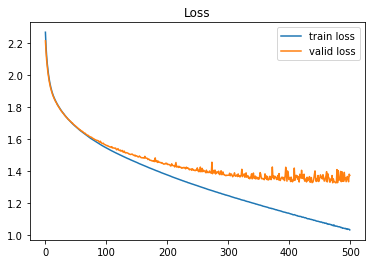

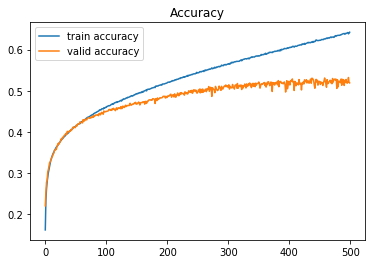

In [20]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

##共執行46分鐘